In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import warnings
import seaborn as sns
import matplotlib.pyplot as plt

warnings.filterwarnings('ignore')

mercedes_data=pd.read_csv('Mercedes.csv')


cat_cols=[col for col in mercedes_data.columns if mercedes_data[col].dtype=='object']

target=mercedes_data['y']

mercedes_data.drop(columns='y',inplace=True)

cols_to_drop=[]

for col in mercedes_data.columns:
    if len(np.unique(mercedes_data[col]))== mercedes_data.shape[0] or len(np.unique(mercedes_data[col]))==1:
        cols_to_drop.append(col)

cols_to_drop

mercedes_data.drop(columns=cols_to_drop,inplace=True)

X_train,X_test,y_train,y_test=train_test_split(mercedes_data,target,test_size=0.2,random_state=42)

target.describe()


le=LabelEncoder()



cols_to_drop

['ID',
 'X11',
 'X93',
 'X107',
 'X233',
 'X235',
 'X268',
 'X289',
 'X290',
 'X293',
 'X297',
 'X330',
 'X347']

In [3]:
cols_to_drop=[]

for col in mercedes_data.columns:
    if len(np.unique(mercedes_data[col]))== mercedes_data.shape[0] or len(np.unique(mercedes_data[col]))==1:
        cols_to_drop.append(col)

cols_to_drop

[]

In [4]:
mercedes_data.shape

(4209, 364)

In [5]:
class LabelEncoderExt(object):
    def __init__(self):
        """
        It differs from LabelEncoder by handling new classes and providing a value for it [Unknown]
        Unknown will be added in fit and transform will take care of new item. It gives unknown class id
        """
        self.label_encoder = LabelEncoder()
        # self.classes_ = self.label_encoder.classes_

    def fit(self, data_list):
        """
        This will fit the encoder for all the unique values and introduce unknown value
        :param data_list: A list of string
        :return: self
        """
        self.label_encoder = self.label_encoder.fit(list(data_list) + ['Unknown'])
        self.classes_ = self.label_encoder.classes_

        return self

    def transform(self, data_list):
        """
        This will transform the data_list to id list where the new values get assigned to Unknown class
        :param data_list:
        :return:
        """
        new_data_list = list(data_list)
        for unique_item in np.unique(data_list):
            if unique_item not in self.label_encoder.classes_:
                new_data_list = ['Unknown' if x==unique_item else x for x in new_data_list]

        return self.label_encoder.transform(new_data_list)

In [6]:
le=LabelEncoderExt()

cat_cols=[col for col in X_train.columns if X_train[col].dtype=='object']
for col in cat_cols:
    le.fit(X_train[col])
    X_train[col]=le.transform(X_train[col])
    X_test[col]=le.transform(X_test[col])
    

X_train.values

array([[34, 24, 17, ...,  0,  0,  0],
       [35, 21, 17, ...,  0,  0,  0],
       [27,  5, 33, ...,  0,  0,  0],
       ...,
       [45, 25,  4, ...,  0,  0,  0],
       [45, 20,  9, ...,  0,  0,  0],
       [22,  2,  8, ...,  0,  0,  0]], dtype=int64)

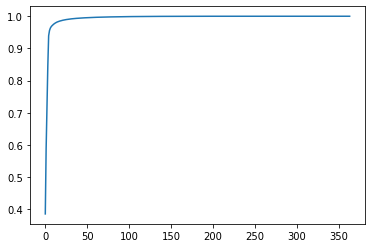

In [7]:
from sklearn.decomposition import  PCA

pca=PCA()
X_train_pca_df=pd.DataFrame(pca.fit_transform(X_train))

plt.plot(np.cumsum(pca.explained_variance_ratio_))



In [8]:
pca_1=PCA(n_components=50)

X_train_pca_df=pd.DataFrame(pca_1.fit_transform(X_train),columns=list(range(0,50)))

X_test_pca_df=pd.DataFrame(pca_1.transform(X_test))

In [9]:
# Proof that PCA results in Zero or No Multicollinearity

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_pca = pd.DataFrame()
vif_pca["VIF Factor_PCA"] = [variance_inflation_factor(X_train_pca_df.values, i) for i in range(X_train_pca_df.shape[1])]

vif_pca['Column Name']=X_train_pca_df.columns

vif_pca


,VIF Factor_PCA,Column Name
0,1.0,0
1,1.0,1
2,1.0,2
3,1.0,3
4,1.0,4
5,1.0,5
6,1.0,6
7,1.0,7
8,1.0,8
9,1.0,9


In [10]:
# multicollinearity exists on the data wihout PCA
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]

vif['Column Name']=X_train.columns

vif


,VIF Factor,Column Name
0,2.675180,X0
1,6.709193,X1
2,19.729722,X2
3,2.896552,X3
4,1.040918,X4
...,...,...
359,inf,X380
360,inf,X382
361,1.413636,X383
362,1.442836,X384


In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error

lin_reg=LinearRegression()

lin_reg.fit(X_train_pca_df,y_train)

y_linreg_pred=lin_reg.predict(X_test_pca_df)

r2_score(y_true=y_test,y_pred=y_linreg_pred)
print('Train Score:----',lin_reg.score(X_train_pca_df,y_train))
print('Test Score:----',lin_reg.score(X_test_pca_df,y_test))

mean_squared_error(y_test,y_linreg_pred)

Train Score:---- 0.5203446253613213
Test Score:---- 0.5389486516505861


71.76261454358647

In [12]:
import pickle

pickle.dump(lin_reg, open('model.pkl','wb'))


In [13]:
from sklearn.linear_model import Lasso

lasso=Lasso(alpha=1)
lasso.fit(X_train_pca_df,y_train)
y_lasso_pred=lasso.predict(X_test_pca_df)

lasso.score(X_test_pca_df,y_test)

0.45968301170892045

In [14]:
from functools import reduce

list_a=[1,2,2,2]

reduce(lambda x,y:x+y,list_a)

7

In [17]:
from sklearn.ensemble import GradientBoostingRegressor
grd_bst=GradientBoostingRegressor()
grd_bst.fit(X_train_pca_df,y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [18]:
from sklearn.tree import DecisionTreeRegressor

dtr=DecisionTreeRegressor(random_state=10)

dtr.fit(X_train_pca_df,y_train)

dtr_pred=dtr.predict(X_test_pca_df)

dtr_pred

array([ 86.27      ,  88.74      , 111.48      ,  77.36      ,
        97.79      ,  90.13      ,  97.36      ,  98.93      ,
       112.69      , 122.84666667,  73.76      ,  89.34      ,
        87.78      , 106.21      ,  93.11      ,  92.58      ,
       116.04      ,  91.89      ,  90.52      , 111.42      ,
       107.37      ,  88.755     , 100.35      , 103.68      ,
       103.23      , 115.18      , 105.53      ,  86.19      ,
        92.91      ,  93.76      ,  90.03      , 105.55      ,
        88.95      , 140.15      , 109.13      , 109.87      ,
       117.49      ,  89.19      ,  91.25666667,  89.8       ,
       107.37      , 108.74      , 139.07      , 146.83      ,
        87.83      ,  88.27      ,  90.05      , 101.74      ,
       109.45      , 102.31      ,  90.69      ,  94.88      ,
        97.42      , 103.14      ,  90.32      ,  89.54      ,
       107.29      , 116.93      ,  90.32      ,  97.28      ,
       112.95      ,  77.06      ,  92.38      ,  95.65

In [31]:
from sklearn.model_selection import RandomizedSearchCV

hyp_dict={
           'max_depth':[15,18],
          'min_samples_split':[8,10,14],
          'max_leaf_nodes':[10,12],
          'max_features':['sqrt','log2']    
        }
gcv=RandomizedSearchCV(estimator=dtr,param_distributions=hyp_dict,cv=10,n_iter=10)

gcv.fit(X_train_pca_df,y_train)

gcv.best_params_

gcv.best_score_

dtc_gcv_pred=gcv.predict(X_test_pca_df)

In [29]:
dtc_gcv_pred

array([110.95217923,  98.88430769, 109.40891765,  97.118784  ,
       110.95217923,  97.118784  ,  82.42245098,  97.118784  ,
        96.71161905, 109.40891765,  82.42245098,  96.71161905,
        97.118784  ,  97.118784  ,  97.118784  ,  97.118784  ,
       110.95217923,  98.88430769,  95.27548387, 110.95217923,
       110.95217923,  97.118784  ,  97.118784  ,  97.118784  ,
        96.71161905, 110.95217923,  97.118784  ,  82.42245098,
        97.118784  ,  97.118784  ,  97.118784  ,  98.88430769,
        97.118784  ,  98.88430769,  97.118784  ,  98.88430769,
       110.95217923,  97.118784  ,  96.34845528,  96.71161905,
       110.95217923, 109.40891765,  97.118784  , 109.40891765,
        98.88430769,  96.34845528,  98.88430769, 102.51073529,
       109.40891765,  97.118784  ,  97.118784  ,  98.88430769,
        98.88430769, 110.95217923,  97.118784  ,  97.118784  ,
        97.118784  , 110.95217923,  97.118784  ,  98.88430769,
       110.95217923,  82.42245098,  96.34845528,  96.71

In [22]:
from sklearn.model_selection import GridSearchCV

hyp_dict={
           'max_depth':[10,12,15,18],
          'min_samples_split':[8,10,14],
          'max_leaf_nodes':[8,9,10,12],
          'max_features':['sqrt','log2']    
        }
gcv=GridSearchCV(estimator=dtr,param_grid=hyp_dict,cv=5,verbose=42)

gcv.fit(X_train_pca_df,y_train)

gcv.best_params_

gcv.best_score_

Fitting 5 folds for each of 96 candidates, totalling 480 fits
[CV] max_depth=10, max_features=sqrt, max_leaf_nodes=8, min_samples_split=8 
[CV]  max_depth=10, max_features=sqrt, max_leaf_nodes=8, min_samples_split=8, score=0.134, total=   0.0s
[CV] max_depth=10, max_features=sqrt, max_leaf_nodes=8, min_samples_split=8 
[CV]  max_depth=10, max_features=sqrt, max_leaf_nodes=8, min_samples_split=8, score=0.150, total=   0.0s
[CV] max_depth=10, max_features=sqrt, max_leaf_nodes=8, min_samples_split=8 
[CV]  max_depth=10, max_features=sqrt, max_leaf_nodes=8, min_samples_split=8, score=0.211, total=   0.0s
[CV] max_depth=10, max_features=sqrt, max_leaf_nodes=8, min_samples_split=8 
[CV]  max_depth=10, max_features=sqrt, max_leaf_nodes=8, min_samples_split=8, score=0.271, total=   0.0s
[CV] max_depth=10, max_features=sqrt, max_leaf_nodes=8, min_samples_split=8 
[CV]  max_depth=10, max_features=sqrt, max_leaf_nodes=8, min_samples_split=8, score=0.175, total=   0.0s
[CV] max_depth=10, max_featu

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s



[CV] max_depth=10, max_features=sqrt, max_leaf_nodes=8, min_samples_split=10 
[CV]  max_depth=10, max_features=sqrt, max_leaf_nodes=8, min_samples_split=10, score=0.211, total=   0.0s
[CV] max_depth=10, max_features=sqrt, max_leaf_nodes=8, min_samples_split=10 
[CV]  max_depth=10, max_features=sqrt, max_leaf_nodes=8, min_samples_split=10, score=0.271, total=   0.0s
[CV] max_depth=10, max_features=sqrt, max_leaf_nodes=8, min_samples_split=10 
[CV]  max_depth=10, max_features=sqrt, max_leaf_nodes=8, min_samples_split=10, score=0.175, total=   0.0s
[CV] max_depth=10, max_features=sqrt, max_leaf_nodes=8, min_samples_split=14 
[CV]  max_depth=10, max_features=sqrt, max_leaf_nodes=8, min_samples_split=14, score=0.134, total=   0.0s
[CV] max_depth=10, max_features=sqrt, max_leaf_nodes=8, min_samples_split=14 
[CV]  max_depth=10, max_features=sqrt, max_leaf_nodes=8, min_samples_split=14, score=0.150, total=   0.0s
[CV] max_depth=10, max_features=sqrt, max_leaf_nodes=8, min_samples_split=14 
[

[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    0.3s remaining:    0.0s


[CV]  max_depth=10, max_features=sqrt, max_leaf_nodes=9, min_samples_split=8, score=0.155, total=   0.0s
[CV] max_depth=10, max_features=sqrt, max_leaf_nodes=9, min_samples_split=8 
[CV]  max_depth=10, max_features=sqrt, max_leaf_nodes=9, min_samples_split=8, score=0.227, total=   0.0s
[CV] max_depth=10, max_features=sqrt, max_leaf_nodes=9, min_samples_split=8 
[CV]  max_depth=10, max_features=sqrt, max_leaf_nodes=9, min_samples_split=8, score=0.264, total=   0.0s
[CV] max_depth=10, max_features=sqrt, max_leaf_nodes=9, min_samples_split=8 
[CV]  max_depth=10, max_features=sqrt, max_leaf_nodes=9, min_samples_split=8, score=0.187, total=   0.0s
[CV] max_depth=10, max_features=sqrt, max_leaf_nodes=9, min_samples_split=10 
[CV]  max_depth=10, max_features=sqrt, max_leaf_nodes=9, min_samples_split=10, score=0.162, total=   0.0s
[CV] max_depth=10, max_features=sqrt, max_leaf_nodes=9, min_samples_split=10 
[CV]  max_depth=10, max_features=sqrt, max_leaf_nodes=9, min_samples_split=10, score=0.

[Parallel(n_jobs=1)]: Done  17 out of  17 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  21 out of  21 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  22 out of  22 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  23 out of  23 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.5s remaining:    0.0s


[CV]  max_depth=10, max_features=sqrt, max_leaf_nodes=9, min_samples_split=14, score=0.162, total=   0.0s
[CV] max_depth=10, max_features=sqrt, max_leaf_nodes=9, min_samples_split=14 
[CV]  max_depth=10, max_features=sqrt, max_leaf_nodes=9, min_samples_split=14, score=0.155, total=   0.0s
[CV] max_depth=10, max_features=sqrt, max_leaf_nodes=9, min_samples_split=14 
[CV]  max_depth=10, max_features=sqrt, max_leaf_nodes=9, min_samples_split=14, score=0.227, total=   0.0s
[CV] max_depth=10, max_features=sqrt, max_leaf_nodes=9, min_samples_split=14 
[CV]  max_depth=10, max_features=sqrt, max_leaf_nodes=9, min_samples_split=14, score=0.264, total=   0.0s
[CV] max_depth=10, max_features=sqrt, max_leaf_nodes=9, min_samples_split=14 
[CV]  max_depth=10, max_features=sqrt, max_leaf_nodes=9, min_samples_split=14, score=0.187, total=   0.0s
[CV] max_depth=10, max_features=sqrt, max_leaf_nodes=10, min_samples_split=8 
[CV]  max_depth=10, max_features=sqrt, max_leaf_nodes=10, min_samples_split=8, s

[Parallel(n_jobs=1)]: Done  26 out of  26 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  28 out of  28 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  29 out of  29 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  31 out of  31 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  32 out of  32 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  33 out of  33 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  34 out of  34 | elapsed:    0.7s remaining:    0.0s


[CV]  max_depth=10, max_features=sqrt, max_leaf_nodes=10, min_samples_split=8, score=0.196, total=   0.0s
[CV] max_depth=10, max_features=sqrt, max_leaf_nodes=10, min_samples_split=10 
[CV]  max_depth=10, max_features=sqrt, max_leaf_nodes=10, min_samples_split=10, score=0.166, total=   0.0s
[CV] max_depth=10, max_features=sqrt, max_leaf_nodes=10, min_samples_split=10 
[CV]  max_depth=10, max_features=sqrt, max_leaf_nodes=10, min_samples_split=10, score=0.166, total=   0.0s
[CV] max_depth=10, max_features=sqrt, max_leaf_nodes=10, min_samples_split=10 
[CV]  max_depth=10, max_features=sqrt, max_leaf_nodes=10, min_samples_split=10, score=0.249, total=   0.0s
[CV] max_depth=10, max_features=sqrt, max_leaf_nodes=10, min_samples_split=10 
[CV]  max_depth=10, max_features=sqrt, max_leaf_nodes=10, min_samples_split=10, score=0.286, total=   0.0s
[CV] max_depth=10, max_features=sqrt, max_leaf_nodes=10, min_samples_split=10 
[CV]  max_depth=10, max_features=sqrt, max_leaf_nodes=10, min_samples_s

[Parallel(n_jobs=1)]: Done  35 out of  35 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  36 out of  36 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  37 out of  37 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  38 out of  38 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  39 out of  39 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  41 out of  41 | elapsed:    0.9s remaining:    0.0s


[CV]  max_depth=10, max_features=sqrt, max_leaf_nodes=10, min_samples_split=14, score=0.286, total=   0.0s
[CV] max_depth=10, max_features=sqrt, max_leaf_nodes=10, min_samples_split=14 
[CV]  max_depth=10, max_features=sqrt, max_leaf_nodes=10, min_samples_split=14, score=0.196, total=   0.0s
[CV] max_depth=10, max_features=sqrt, max_leaf_nodes=12, min_samples_split=8 
[CV]  max_depth=10, max_features=sqrt, max_leaf_nodes=12, min_samples_split=8, score=0.153, total=   0.0s
[CV] max_depth=10, max_features=sqrt, max_leaf_nodes=12, min_samples_split=8 
[CV]  max_depth=10, max_features=sqrt, max_leaf_nodes=12, min_samples_split=8, score=0.147, total=   0.0s
[CV] max_depth=10, max_features=sqrt, max_leaf_nodes=12, min_samples_split=8 
[CV]  max_depth=10, max_features=sqrt, max_leaf_nodes=12, min_samples_split=8, score=0.259, total=   0.0s
[CV] max_depth=10, max_features=sqrt, max_leaf_nodes=12, min_samples_split=8 
[CV]  max_depth=10, max_features=sqrt, max_leaf_nodes=12, min_samples_split=8

[CV]  max_depth=10, max_features=log2, max_leaf_nodes=9, min_samples_split=14, score=-0.019, total=   0.0s
[CV] max_depth=10, max_features=log2, max_leaf_nodes=10, min_samples_split=8 
[CV]  max_depth=10, max_features=log2, max_leaf_nodes=10, min_samples_split=8, score=0.211, total=   0.0s
[CV] max_depth=10, max_features=log2, max_leaf_nodes=10, min_samples_split=8 
[CV]  max_depth=10, max_features=log2, max_leaf_nodes=10, min_samples_split=8, score=0.216, total=   0.0s
[CV] max_depth=10, max_features=log2, max_leaf_nodes=10, min_samples_split=8 
[CV]  max_depth=10, max_features=log2, max_leaf_nodes=10, min_samples_split=8, score=0.285, total=   0.0s
[CV] max_depth=10, max_features=log2, max_leaf_nodes=10, min_samples_split=8 
[CV]  max_depth=10, max_features=log2, max_leaf_nodes=10, min_samples_split=8, score=0.237, total=   0.0s
[CV] max_depth=10, max_features=log2, max_leaf_nodes=10, min_samples_split=8 
[CV]  max_depth=10, max_features=log2, max_leaf_nodes=10, min_samples_split=8, 

[CV]  max_depth=12, max_features=sqrt, max_leaf_nodes=9, min_samples_split=8, score=0.187, total=   0.0s
[CV] max_depth=12, max_features=sqrt, max_leaf_nodes=9, min_samples_split=10 
[CV]  max_depth=12, max_features=sqrt, max_leaf_nodes=9, min_samples_split=10, score=0.162, total=   0.0s
[CV] max_depth=12, max_features=sqrt, max_leaf_nodes=9, min_samples_split=10 
[CV]  max_depth=12, max_features=sqrt, max_leaf_nodes=9, min_samples_split=10, score=0.155, total=   0.0s
[CV] max_depth=12, max_features=sqrt, max_leaf_nodes=9, min_samples_split=10 
[CV]  max_depth=12, max_features=sqrt, max_leaf_nodes=9, min_samples_split=10, score=0.227, total=   0.0s
[CV] max_depth=12, max_features=sqrt, max_leaf_nodes=9, min_samples_split=10 
[CV]  max_depth=12, max_features=sqrt, max_leaf_nodes=9, min_samples_split=10, score=0.264, total=   0.0s
[CV] max_depth=12, max_features=sqrt, max_leaf_nodes=9, min_samples_split=10 
[CV]  max_depth=12, max_features=sqrt, max_leaf_nodes=9, min_samples_split=10, sc

[CV]  max_depth=12, max_features=log2, max_leaf_nodes=8, min_samples_split=8, score=0.235, total=   0.0s
[CV] max_depth=12, max_features=log2, max_leaf_nodes=8, min_samples_split=10 
[CV]  max_depth=12, max_features=log2, max_leaf_nodes=8, min_samples_split=10, score=0.205, total=   0.0s
[CV] max_depth=12, max_features=log2, max_leaf_nodes=8, min_samples_split=10 
[CV]  max_depth=12, max_features=log2, max_leaf_nodes=8, min_samples_split=10, score=0.211, total=   0.0s
[CV] max_depth=12, max_features=log2, max_leaf_nodes=8, min_samples_split=10 
[CV]  max_depth=12, max_features=log2, max_leaf_nodes=8, min_samples_split=10, score=0.248, total=   0.0s
[CV] max_depth=12, max_features=log2, max_leaf_nodes=8, min_samples_split=10 
[CV]  max_depth=12, max_features=log2, max_leaf_nodes=8, min_samples_split=10, score=0.214, total=   0.0s
[CV] max_depth=12, max_features=log2, max_leaf_nodes=8, min_samples_split=10 
[CV]  max_depth=12, max_features=log2, max_leaf_nodes=8, min_samples_split=10, sc

[CV]  max_depth=12, max_features=log2, max_leaf_nodes=12, min_samples_split=14, score=0.236, total=   0.0s
[CV] max_depth=12, max_features=log2, max_leaf_nodes=12, min_samples_split=14 
[CV]  max_depth=12, max_features=log2, max_leaf_nodes=12, min_samples_split=14, score=0.328, total=   0.0s
[CV] max_depth=12, max_features=log2, max_leaf_nodes=12, min_samples_split=14 
[CV]  max_depth=12, max_features=log2, max_leaf_nodes=12, min_samples_split=14, score=0.261, total=   0.0s
[CV] max_depth=12, max_features=log2, max_leaf_nodes=12, min_samples_split=14 
[CV]  max_depth=12, max_features=log2, max_leaf_nodes=12, min_samples_split=14, score=0.012, total=   0.0s
[CV] max_depth=15, max_features=sqrt, max_leaf_nodes=8, min_samples_split=8 
[CV]  max_depth=15, max_features=sqrt, max_leaf_nodes=8, min_samples_split=8, score=0.134, total=   0.0s
[CV] max_depth=15, max_features=sqrt, max_leaf_nodes=8, min_samples_split=8 
[CV]  max_depth=15, max_features=sqrt, max_leaf_nodes=8, min_samples_split=8

[CV]  max_depth=15, max_features=sqrt, max_leaf_nodes=12, min_samples_split=8, score=0.259, total=   0.0s
[CV] max_depth=15, max_features=sqrt, max_leaf_nodes=12, min_samples_split=8 
[CV]  max_depth=15, max_features=sqrt, max_leaf_nodes=12, min_samples_split=8, score=0.294, total=   0.0s
[CV] max_depth=15, max_features=sqrt, max_leaf_nodes=12, min_samples_split=8 
[CV]  max_depth=15, max_features=sqrt, max_leaf_nodes=12, min_samples_split=8, score=0.228, total=   0.0s
[CV] max_depth=15, max_features=sqrt, max_leaf_nodes=12, min_samples_split=10 
[CV]  max_depth=15, max_features=sqrt, max_leaf_nodes=12, min_samples_split=10, score=0.153, total=   0.0s
[CV] max_depth=15, max_features=sqrt, max_leaf_nodes=12, min_samples_split=10 
[CV]  max_depth=15, max_features=sqrt, max_leaf_nodes=12, min_samples_split=10, score=0.174, total=   0.0s
[CV] max_depth=15, max_features=sqrt, max_leaf_nodes=12, min_samples_split=10 
[CV]  max_depth=15, max_features=sqrt, max_leaf_nodes=12, min_samples_split

[CV]  max_depth=15, max_features=log2, max_leaf_nodes=10, min_samples_split=10, score=0.211, total=   0.0s
[CV] max_depth=15, max_features=log2, max_leaf_nodes=10, min_samples_split=10 
[CV]  max_depth=15, max_features=log2, max_leaf_nodes=10, min_samples_split=10, score=0.216, total=   0.0s
[CV] max_depth=15, max_features=log2, max_leaf_nodes=10, min_samples_split=10 
[CV]  max_depth=15, max_features=log2, max_leaf_nodes=10, min_samples_split=10, score=0.285, total=   0.0s
[CV] max_depth=15, max_features=log2, max_leaf_nodes=10, min_samples_split=10 
[CV]  max_depth=15, max_features=log2, max_leaf_nodes=10, min_samples_split=10, score=0.237, total=   0.0s
[CV] max_depth=15, max_features=log2, max_leaf_nodes=10, min_samples_split=10 
[CV]  max_depth=15, max_features=log2, max_leaf_nodes=10, min_samples_split=10, score=-0.015, total=   0.0s
[CV] max_depth=15, max_features=log2, max_leaf_nodes=10, min_samples_split=14 
[CV]  max_depth=15, max_features=log2, max_leaf_nodes=10, min_samples

[CV]  max_depth=18, max_features=sqrt, max_leaf_nodes=9, min_samples_split=10, score=0.162, total=   0.0s
[CV] max_depth=18, max_features=sqrt, max_leaf_nodes=9, min_samples_split=10 
[CV]  max_depth=18, max_features=sqrt, max_leaf_nodes=9, min_samples_split=10, score=0.155, total=   0.0s
[CV] max_depth=18, max_features=sqrt, max_leaf_nodes=9, min_samples_split=10 
[CV]  max_depth=18, max_features=sqrt, max_leaf_nodes=9, min_samples_split=10, score=0.227, total=   0.0s
[CV] max_depth=18, max_features=sqrt, max_leaf_nodes=9, min_samples_split=10 
[CV]  max_depth=18, max_features=sqrt, max_leaf_nodes=9, min_samples_split=10, score=0.264, total=   0.0s
[CV] max_depth=18, max_features=sqrt, max_leaf_nodes=9, min_samples_split=10 
[CV]  max_depth=18, max_features=sqrt, max_leaf_nodes=9, min_samples_split=10, score=0.187, total=   0.0s
[CV] max_depth=18, max_features=sqrt, max_leaf_nodes=9, min_samples_split=14 
[CV]  max_depth=18, max_features=sqrt, max_leaf_nodes=9, min_samples_split=14, s

[CV]  max_depth=18, max_features=log2, max_leaf_nodes=8, min_samples_split=10, score=0.235, total=   0.0s
[CV] max_depth=18, max_features=log2, max_leaf_nodes=8, min_samples_split=14 
[CV]  max_depth=18, max_features=log2, max_leaf_nodes=8, min_samples_split=14, score=0.205, total=   0.0s
[CV] max_depth=18, max_features=log2, max_leaf_nodes=8, min_samples_split=14 
[CV]  max_depth=18, max_features=log2, max_leaf_nodes=8, min_samples_split=14, score=0.211, total=   0.0s
[CV] max_depth=18, max_features=log2, max_leaf_nodes=8, min_samples_split=14 
[CV]  max_depth=18, max_features=log2, max_leaf_nodes=8, min_samples_split=14, score=0.248, total=   0.0s
[CV] max_depth=18, max_features=log2, max_leaf_nodes=8, min_samples_split=14 
[CV]  max_depth=18, max_features=log2, max_leaf_nodes=8, min_samples_split=14, score=0.214, total=   0.0s
[CV] max_depth=18, max_features=log2, max_leaf_nodes=8, min_samples_split=14 
[CV]  max_depth=18, max_features=log2, max_leaf_nodes=8, min_samples_split=14, s

[CV]  max_depth=18, max_features=log2, max_leaf_nodes=12, min_samples_split=10, score=0.261, total=   0.0s
[CV] max_depth=18, max_features=log2, max_leaf_nodes=12, min_samples_split=10 
[CV]  max_depth=18, max_features=log2, max_leaf_nodes=12, min_samples_split=10, score=0.012, total=   0.0s
[CV] max_depth=18, max_features=log2, max_leaf_nodes=12, min_samples_split=14 
[CV]  max_depth=18, max_features=log2, max_leaf_nodes=12, min_samples_split=14, score=0.233, total=   0.0s
[CV] max_depth=18, max_features=log2, max_leaf_nodes=12, min_samples_split=14 
[CV]  max_depth=18, max_features=log2, max_leaf_nodes=12, min_samples_split=14, score=0.236, total=   0.0s
[CV] max_depth=18, max_features=log2, max_leaf_nodes=12, min_samples_split=14 
[CV]  max_depth=18, max_features=log2, max_leaf_nodes=12, min_samples_split=14, score=0.328, total=   0.0s
[CV] max_depth=18, max_features=log2, max_leaf_nodes=12, min_samples_split=14 
[CV]  max_depth=18, max_features=log2, max_leaf_nodes=12, min_samples_

[Parallel(n_jobs=1)]: Done 480 out of 480 | elapsed:   10.5s finished


0.22271044992595687